# The Perceptron Learning Algorithm (PLA)
### Language: Julia
### Author: Daisy Nsibu

# 1. Introduction



### 1.1. What is Perceptron Algorithm?
The *'Hello World'* of machine learning is the Perceptron learning algorithm (PLA). I should mention this ml algorithm is due to [Frank Rosenblatt](https://news.cornell.edu/stories/2019/09/professors-perceptron-paved-way-ai-60-years-too-soon) ($\approx 1950$) and this is then beginnning of artifical intelligence (AI). 

*(Note: I use superscripts instead of subscripts to count the number of elements that are in the dataset that we own)*
    Let's suppose we have a dataset, 
    $${D} = \lbrace(x^{i}, y^{i}), \dotsb, (x^{N}, y^{N})\rbrace$$
    
Where we have features, $x^{i}$, and labels $y^{i}$. The $y$ values here are either -1 or 1.
 The label space, $${Y} = \lbrace -1, 1 \rbrace$$ and 
 the feature space, $${X} \subseteq \mathbb{R}^{d}$$

For a concrete example lets look at the famour iris dataset. The labels can correspond to types of flowers. Suppose that label -1 would be a Virginica flower and label 1 could be the Versicolor flower. The feature space, $X$, is going to consist of measurements of these flowers.

So the x vector are the measurements of the flower, the y value is whether or not it's a Virginicia or a Versicolor flower. Since there happens to be only two labels, we say that it's a binary classifier. The goal: We're trying to classify, if we get new features we measure these features and predict wheter or not it 's  a Virginicia or a Versicolor flower.

So we are going to imagine this as a neuron. The way neurons work is that they receive signals and if these signals are beyond a certain threshold the neuron fires, and it passes the signal along.

Maybe we can say, 
+ let $w \subseteq \mathbb{R}^{d}$ be weights

if ${w}^{T}x > \theta = threshold \rightarrow \hat{y}= 1$

we have some weights, we don't know what those weights are, but we do know what x is. so if the linear combination is greater than some threshold we predict 1, 

if ${w}^{T}x < \theta = threshold \rightarrow \hat{y}= -1$
so if the linear combination is less than some threshold we predict -1.

What's happening here is that we're taking the features of the flower and we're weighting each of those features and if the combination of summing all those features together with the weights is higher enough the neuron is going to fire.

Lets also suppose  $x \subseteq \mathbb{R}^{2}$, we only have 2 measurements to work with.

Let, $ -b = \theta$ which is the bias. So if ${w}^{T}x + b > 0, \hat{y} = 1$. If ${w}^{T}x + b > 0, \hat{y} = -1$. In simpler terms,

${w}^{T}x + b = {w_1}x_1+{w_2}x_2 + b$, so to make things notationally easier I'm going to modify our weights and our x so I can write this as one term without the b.

if $x^{i} = \begin{bmatrix}{x^i}_{1}\\{x^i}_{2}\end{bmatrix}$, then $\bar{x}^{i} = \begin{bmatrix}{1.0}\\{x^i}_{1}\\{x^i}_{2}\end{bmatrix}$

if $w = \begin{bmatrix}{w}_{1}\\{w}_{2}\end{bmatrix}$, then $\bar{w} = \begin{bmatrix}{b}\\{w_1}\\{w_2}\end{bmatrix}$

so then ${w}^{T}x + b = \bar{w}^{T}\bar{x}$. It's just a way to simplfy so that we do not have to deal with the bias. 

($\bar{w}^{T}\bar{x}= b+ x_1w_1+ x_2w_2$)
So $\hat{y}$ is just a single prediction but we want to find our best hypothesis that function, g.

$$g(x) = sign(\bar{w}^{T}\bar{x})=\begin{bmatrix}{1}, \bar{w}^{T}\bar{x} >0\\ {-1}, \bar{w}^{T}\bar{x} < 0 \end{bmatrix}$$





![](https://i.imgur.com/1xcNEaR.png)

# 2. Implementing Perceptron Algorithm ?

## 2.1. Importing Libraries

In [1]:
using RDatasets
using Plots
using PlotThemes
theme(:juno)


In [2]:
using CSV
using Random
using DataFrames

# 3. Choose Features

I'm going to choose the 2 features to be Sepal Length and Sepal Width.

In [3]:
iris= dataset("datasets","iris");
x_data = [x for x in zip(iris.SepalLength[1:100],iris.SepalWidth[1:100])]

100-element Array{Tuple{Float64,Float64},1}:
 (5.1, 3.5)
 (4.9, 3.0)
 (4.7, 3.2)
 (4.6, 3.1)
 (5.0, 3.6)
 (5.4, 3.9)
 (4.6, 3.4)
 (5.0, 3.4)
 (4.4, 2.9)
 (4.9, 3.1)
 (5.4, 3.7)
 (4.8, 3.4)
 (4.8, 3.0)
 ⋮
 (5.6, 3.0)
 (5.5, 2.5)
 (5.5, 2.6)
 (6.1, 3.0)
 (5.8, 2.6)
 (5.0, 2.3)
 (5.6, 2.7)
 (5.7, 3.0)
 (5.7, 2.9)
 (6.2, 2.9)
 (5.1, 2.5)
 (5.7, 2.8)

So we have features that are numerical values and even measurements of sepal length and sepal width. Now I need the labels for those but notice that the labels are not numeric, so i'll just convert them to be 1 or -1. 

In [4]:
y_data = [y == "setosa" ? 1 : -1 for y in iris.Species[1:100]]

100-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

So now instead of *setosa*, I have labels either -1 or 1. So if y is *setosa*, then it's 1 otherwise it's -1. 

## 4. Ploting Data

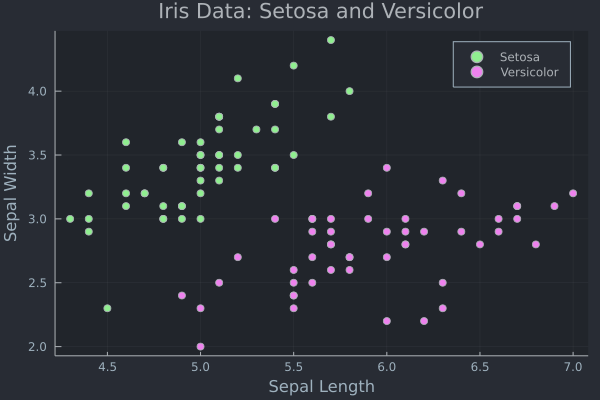

In [5]:
scatter(x_data[1:50],
label = "Setosa",
color = "lightgreen",
xaxis = "Sepal Length",
yaxis = "Sepal Width",
title = "Iris Data: Setosa and Versicolor")

scatter!(x_data[51:100],
label = "Versicolor",
color = "violet")

So we have measurements sepal length versus sepal width. Here, we see that the data are linearly separable. So now we just need to define our functions so that we can implement the perceptron learning algorithm

## 5. Implementing Perceptron Learning Algorithm 

In [6]:
function sign(weight, x)
    x̄ = [1.0, x[1], x[2]]
    return weight'x̄ > 0 ? 1 : -1
end

function perceptron_update_rule(weight, x, y)
    if sign(weight, x) != y
        weight += y*[1.0, x[1], x[2]]
    end
    
    return weight
end

perceptron_update_rule (generic function with 1 method)

In [7]:
function pla(X, Y; epochs = 1000)
    w = randn(3)
    
    count = 1
    while count < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        count += 1
    end
    
    return w
end

pla (generic function with 1 method)

In [8]:
w = pla(x_data, y_data; epochs = 10)

3-element Array{Float64,1}:
  2.6550635239583444
 -8.157004713343797
  7.842911240405143

**What's going on here?**

What we really have is, $$(1.0)w_1 + w_2x_1 + w_3x_2 = z$$
this is some function in a three-dimensional plane.

What we're going to do since we are only concerned about $x_1$ and $x_2$ (2 dimensional plane). We just want to project this function down onto the two-dimensional space to see if we split the data. So we set the function = 0 and then solve for $x_2$ .
$$(1.0)w_1 + w_2x_1 + w_3x_2 = 0$$
$$y=x_2= \frac{-w_2x_1 -w_1}{w_3}$$

So this is going to be a line in two-dimensional space. Let's look at what that line looks like!


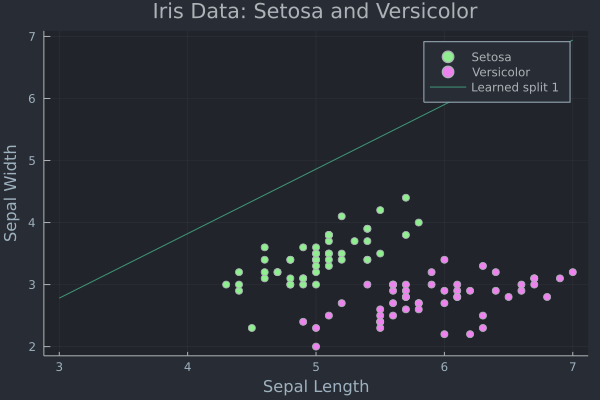

In [9]:
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 3:7],
label = "Learned split 1")

So this is the projection of that plane onto the two-dimensional space and it does not do anything. It does not separte this at all. But what if I change the number of times that I go through the data set to that of perhaps epochs = 50.

In [10]:
w = pla(x_data, y_data; epochs = 50)

3-element Array{Float64,1}:
  10.814334117774813
 -29.497147447894204
  37.956133482637966

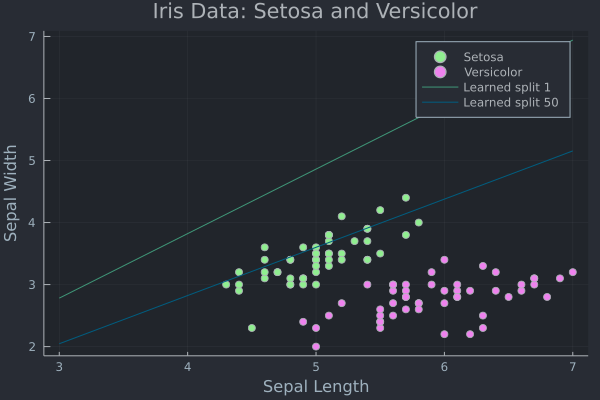

In [11]:
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 3:7],
label = "Learned split 50")

Well it looks like we are doing something right because this is better than what we saw last. But what about it if we do it 100 times? Let's take a look.

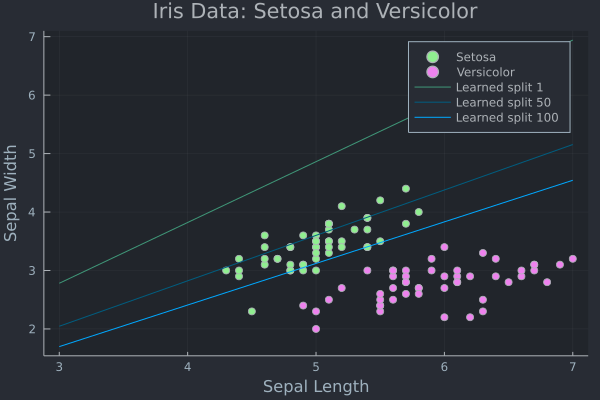

In [12]:
w = pla(x_data, y_data; epochs = 100)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 3:7],
label = "Learned split 100")

It's starting to separate the data. But what about it if we do it 1000 times? Let's take a look.

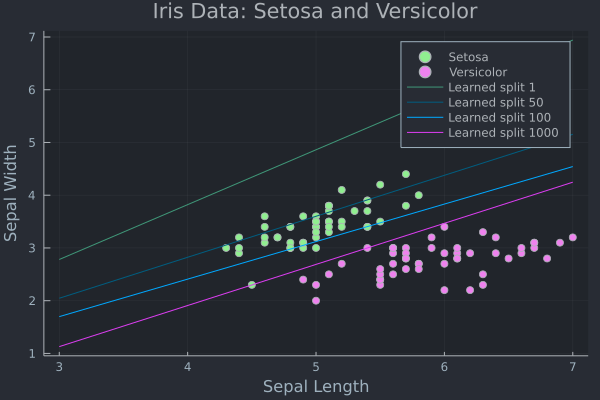

In [13]:
w = pla(x_data, y_data; epochs = 1000)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 3:7],
label = "Learned split 1000")

Look at that line there! It's splitting the data. So if it's a setosa flower the point is above the line and if it's Versicolor the point is below the line. That's what the PLA algorithm is doing, it's learning a linear separator set. A line that separates the values. Now I can write a function predictor

In [14]:
function predictor(weight, x)
    return sign(weight, x) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

In [15]:
iris.Species[30]

CategoricalArrays.CategoricalValue{String,UInt8} "setosa"

Lets look at what our predictor does.


In [16]:
predictor(w, (iris.SepalLength[30], iris.SepalWidth[30]))

"setosa"

This is what we predicted!

In [17]:
k = rand([1, 100])
println("The actual label is: ", iris.Species[k])
println("The predicted label is: ", predictor(w, (iris.SepalLength[k], iris.SepalWidth[k])))

The actual label is: versicolor
The predicted label is: versicolor


---
Penguins Data
---
![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)


The dataset consists of 7 columns.

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer * Archipelago (Antarctica)
* culmen_length_mm: culmen length (mm)
* culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

I'm going to choose the 2 features

In [18]:
# read data
penguins = CSV.read("penguins.csv", DataFrame);
x_data = [x for x in zip(penguins.culmen_length_mm[1:214], penguins.body_mass_g[1:214])]


214-element Array{Tuple{Float64,Int64},1}:
 (39.1, 3750)
 (39.5, 3800)
 (40.3, 3250)
 (36.7, 3450)
 (39.3, 3650)
 (38.9, 3625)
 (39.2, 4675)
 (41.1, 3200)
 (38.6, 3800)
 (34.6, 4400)
 (36.6, 3700)
 (38.7, 3450)
 (42.5, 4500)
 ⋮
 (45.2, 3250)
 (49.3, 4050)
 (50.2, 3800)
 (45.6, 3525)
 (51.9, 3950)
 (46.8, 3650)
 (45.7, 3650)
 (55.8, 4000)
 (43.5, 3400)
 (49.6, 3775)
 (50.8, 4100)
 (50.2, 3775)

In [19]:
names(penguins)


7-element Array{String,1}:
 "species"
 "island"
 "culmen_length_mm"
 "culmen_depth_mm"
 "flipper_length_mm"
 "body_mass_g"
 "sex"

In [20]:
y_data = [penguins.species[i] for i=147:214]

68-element Array{String,1}:
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 ⋮
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"
 "Chinstrap"

In [21]:
y_data = [y == "Adelie" ? 1 : -1 for y in penguins.species[1:214]]

214-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

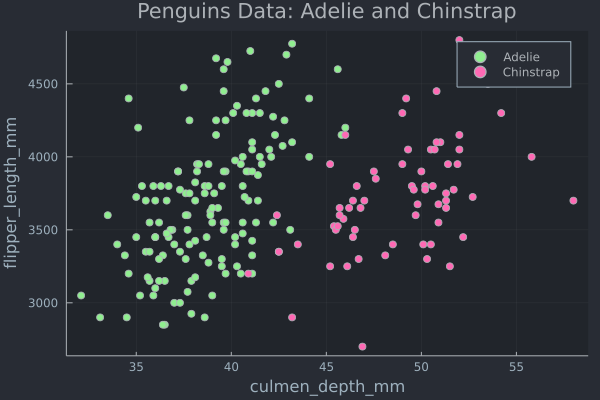

In [22]:
scatter(x_data[1:146],
label = "Adelie",
color = "lightgreen",
xaxis = "culmen_depth_mm",
yaxis = "flipper_length_mm",
title = "Penguins Data: Adelie and Chinstrap")

scatter!(x_data[147:214],
label = "Chinstrap",
color = "hotpink")

In [23]:
w = pla(x_data, y_data; epochs = 10)

3-element Array{Float64,1}:
     1.203778540827984
  -105.50604387780538
 -1499.9814104160046

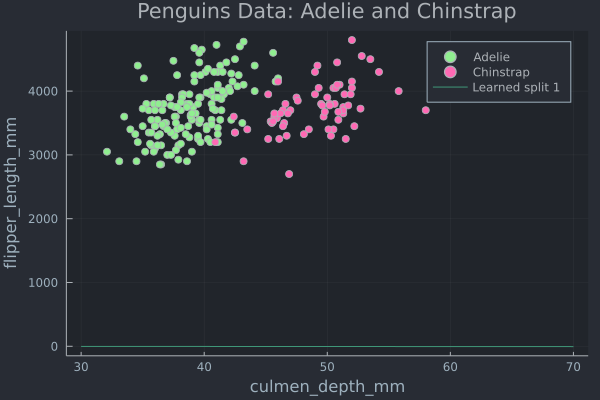

In [24]:
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 1")

In [25]:
w = pla(x_data, y_data; epochs = 50)

3-element Array{Float64,1}:
    -5.081428366429839
  -571.4411254865403
 -3399.2808838002807

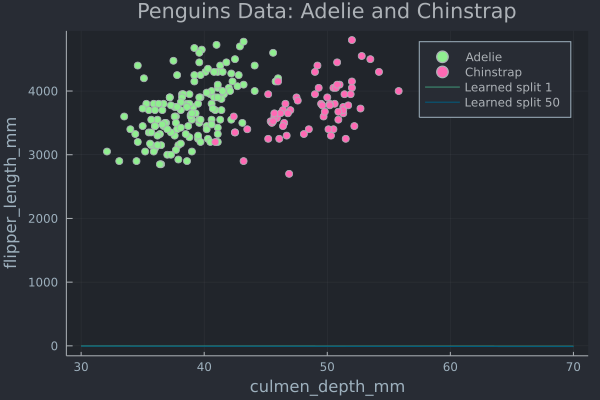

In [26]:
w = pla(x_data, y_data; epochs = 50)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 50")

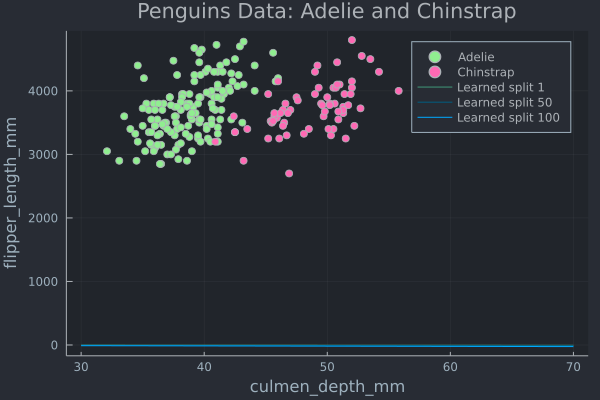

In [27]:
w = pla(x_data, y_data; epochs = 100)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 100")

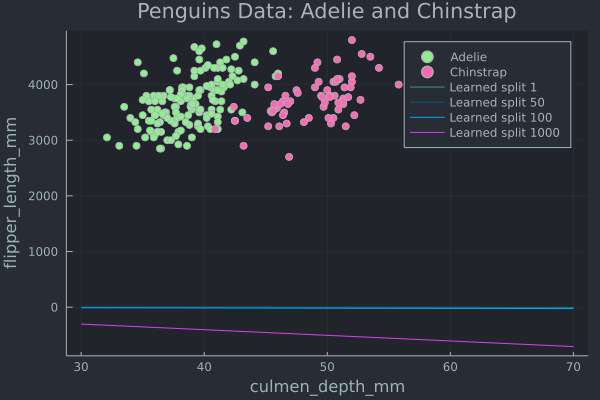

In [28]:
w = pla(x_data, y_data; epochs = 1000)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 1000")

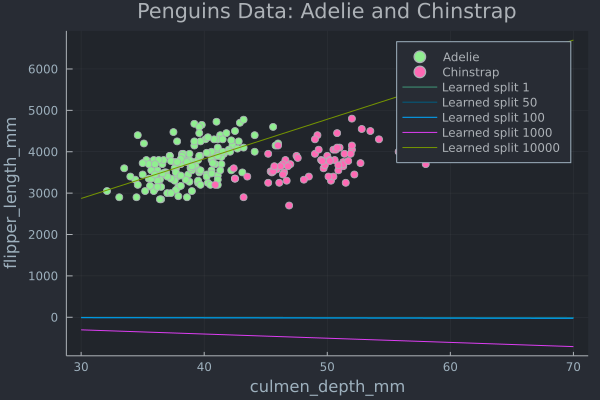

In [29]:
w = pla(x_data, y_data; epochs = 10000)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 10000")

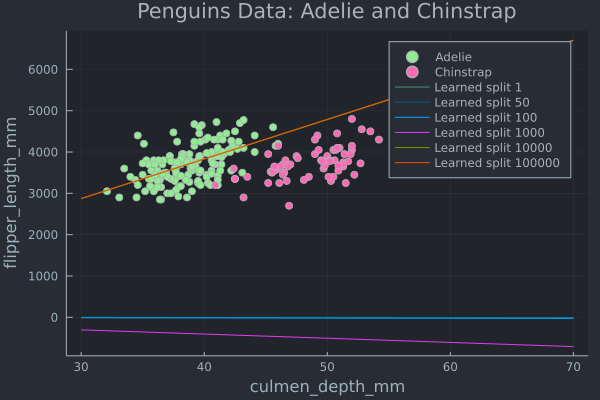

In [30]:
w = pla(x_data, y_data; epochs = 100000)
plot!([(x, (-w[2]*x - w[1]) / w[3]) for x = 30:70],
label = "Learned split 100000")

In [31]:
function predictor(weight, x)
    return sign(weight, x) == 1 ? "Adelie" : "Chinstrap"
end

predictor (generic function with 1 method)

In [32]:
penguins.species[214]

"Chinstrap"

In [33]:
predictor(w, (penguins.culmen_length_mm[214], penguins.body_mass_g[214]))

"Chinstrap"

In [34]:
k = rand([1, 214])
println("The actual label is: ", penguins.species[k])
println("The predicted label is: ", predictor(w, (penguins.culmen_length_mm[k], penguins.body_mass_g[k])))

The actual label is: Adelie
The predicted label is: Adelie


# 6. Conclusion

Using the iris data set, I was able to show the the classifications of iris flowers using features with the use of the perceptron learning algorithm. The algorithm learned to pick the correct weights that gave us the desired hypothesis that approximates this perfect target function that we do not know or that we'll never be able to know. 

The penguins dataset Is starting to  split the data but after 100K epochs its running slow thus i had to cut it short. So if it's a Adelie penguin the point is above the line and if it's Chinstrap penguin the point is below the line. The PLA algorithm was getting there  but it not quite all the way. Although it is learning to  linearly separate the  set. Good thing is that the predictor predicted the right penguin at random.

# References

Géron, Aurélien. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. 2nd ed., O’Reilly Media, 2019.

Penguin Data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081